Датасет. https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Основы ИИ материалы/1.2_smartwatch_health_data.csv')

df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


Проблемы в данных!

Пропущенные значения (NaN) в User ID, Heart Rate, Sleep Duration.

Ошибочные записи, например "ERROR" в длительности сна.

Очень высокий пульс (например, 247 BPM) — подозрение на ошибку измерения.

Несогласованность в названиях активности (пробелы/подчеркивания, опечатки).

# Cleaning Data

In [2]:
empty_cells = df.isna().sum()
duplicateds = df.duplicated().sum()

print(empty_cells)
print(duplicateds)

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64
0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [5]:
df['activity_level'].unique()

df = df.replace({'Highly_Active':'Highly Active', 'Seddentary': 'Sedentary','Actve':'Active'})

Преобразование столбец  в числа.

In [6]:
df['sleep_duration_(hours)']= pd.to_numeric(df['sleep_duration_(hours)'],errors='coerce')
df['stress_level'] = pd.to_numeric(df['stress_level'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 9799 non-null   float64
 1   heart_rate_(bpm)        9600 non-null   float64
 2   blood_oxygen_level_(%)  9700 non-null   float64
 3   step_count              9900 non-null   float64
 4   sleep_duration_(hours)  9603 non-null   float64
 5   activity_level          9800 non-null   object 
 6   stress_level            9751 non-null   float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [7]:
df['activity_level'].unique()

array(['Highly Active', 'Active', 'Sedentary', nan], dtype=object)

In [8]:
df= df.dropna()
df.isna().sum()

,0
user_id,0
heart_rate_(bpm),0
blood_oxygen_level_(%),0
step_count,0
sleep_duration_(hours),0
activity_level,0
stress_level,0


А как удалить значение только в одном столбце?                                                                                         * df = df.dropna(subset=['sleep_duration_(hours)'])


---



In [9]:
df.describe()

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
count,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000
mean,3008.310969,76.000396,97.837248,6996.275243,6.504998,5.433691
std,1152.853217,19.030185,1.739699,6904.773042,1.510821,2.869335
min,1001.000000,40.000000,90.791208,0.910138,-0.194453,1.000000
25%,1998.500000,64.921323,96.654310,1994.654512,5.484881,3.000000
50%,3006.000000,75.321211,98.001247,4970.878786,6.497615,5.000000
75%,4005.000000,85.324321,99.377902,9765.357223,7.532584,8.000000
max,4999.000000,292.923300,100.000000,62486.690753,12.140233,10.000000


 находим "необычные" значения пульса, которые значительно выбиваются из общей массы данных.

In [10]:

Q1 = df['heart_rate_(bpm)'].quantile(0.25)  # 25
Q3 = df['heart_rate_(bpm)'].quantile(0.75)  # 75
IQR = Q3 - Q1                              # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['heart_rate_(bpm)'] < lower_bound) | (df['heart_rate_(bpm)'] > upper_bound)]
print(outliers)


      user_id  heart_rate_(bpm)  blood_oxygen_level_(%)    step_count  \
47     2806.0        118.294933               95.629327    253.743297   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
1188   2836.0        117.710608               99.308541  10506.814653   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1521   2955.0        117.159269               97.492693   3154.284533   
1602   4737.0        215.194681               95.095839  16072.283561   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.280955   3794.430590   
2338   1762.0        256.377377               96.02

In [11]:
len(outliers.index)

59

# Exploratory Data Analysis

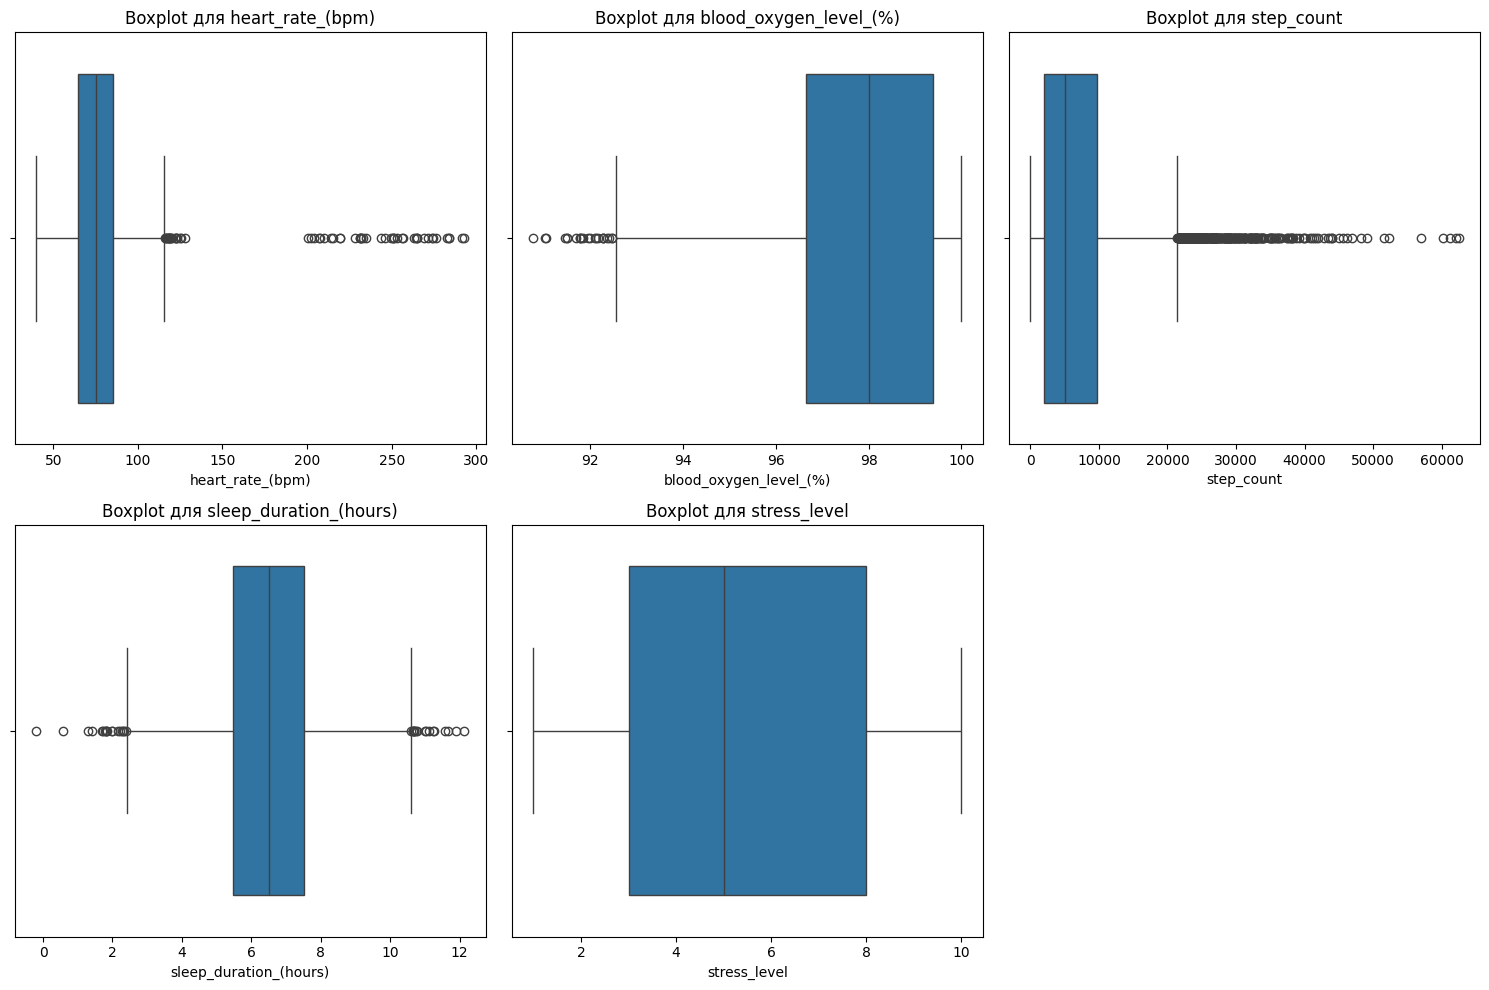

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список интересующих столбцов
columns_to_plot = [
    'heart_rate_(bpm)',
    'blood_oxygen_level_(%)',
    'step_count',
    'sleep_duration_(hours)',
    'stress_level'
]

# Создание отдельных boxplot-ов
plt.figure(figsize=(15, 10))  # размер общего окна графиков

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # размещаем 2 строки по 3 графика
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')

plt.tight_layout()
plt.show()



как уровень стресса (stress_level) распределяется для разных уровней активности (activity_level)?

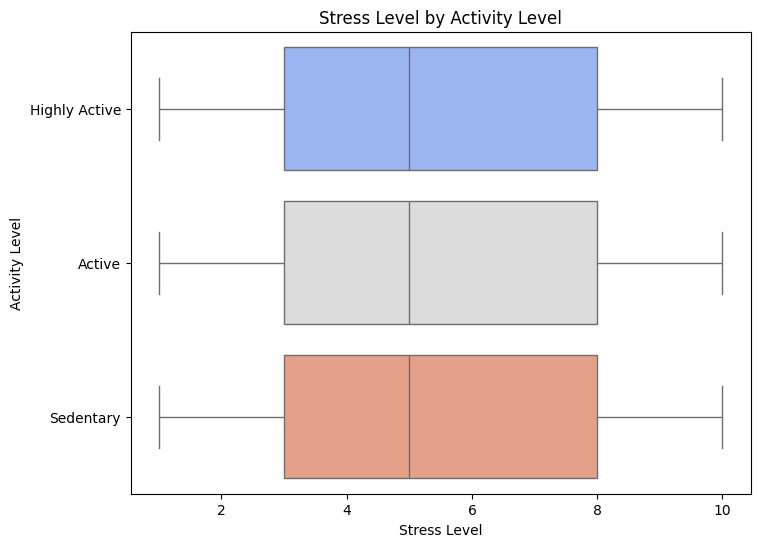

In [13]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data = df,
    x = 'stress_level',
    y = 'activity_level',
    palette = 'coolwarm',
    hue = 'activity_level'
)

plt.legend([], [], frameon=False)
plt.title('Stress Level by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Stress Level')
plt.ylabel('Activity Level')

plt.show()

столбчатая диаграмма, которая показывает среднее количество шагов (step_count) для каждого уровня активности (activity_level).

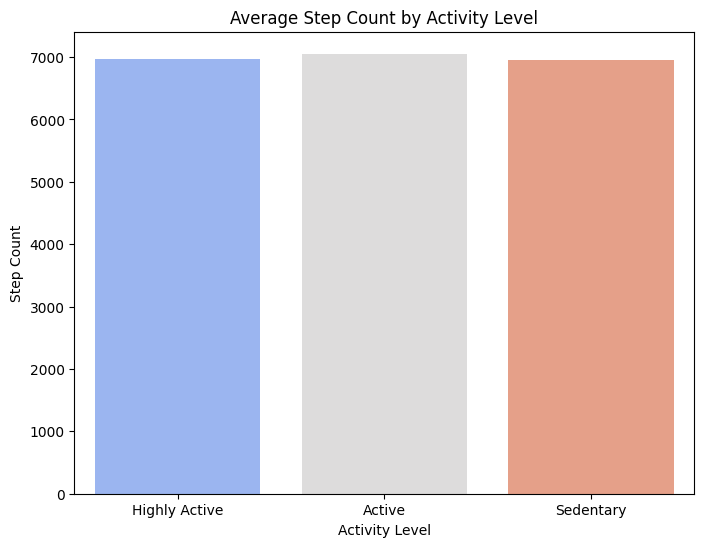

In [14]:
import numpy as np
plt.figure(figsize=(8,6))

sns.barplot(
    data = df,
    x = 'activity_level',
    y = 'step_count',
    estimator = np.mean,
    errorbar = None,
    palette = 'coolwarm',
    hue = 'activity_level'
)
plt.legend([], [], frameon=False)
plt.title('Average Step Count by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Activity Level')
plt.ylabel('Step Count')

plt.show()


круговая диаграмму (pie chart), которая показывает распределение пользователей (user_id) по уровням активности (activity_level) в процентах

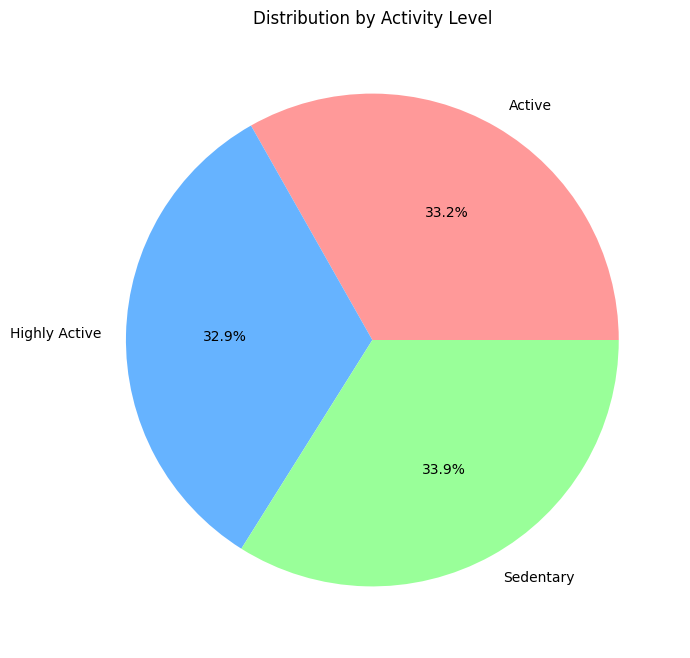

In [15]:
groupby1= df.groupby('activity_level')['user_id'].count().reset_index()
plt.figure(figsize=(10,8))
plt.pie(
    data = groupby1,
    x = 'user_id',
    labels = 'activity_level',
    autopct='%1.1f%%',
    colors = ['#FF9999', '#66B3FF', '#99FF99']
)


plt.title('Distribution by Activity Level')
plt.xticks(size = 10)
plt.show()

диаграмма рассеяния (scatter plot), которая показывает зависимость между частотой сердцебиения (heart_rate_(bpm)) и количеством шагов (step_count).

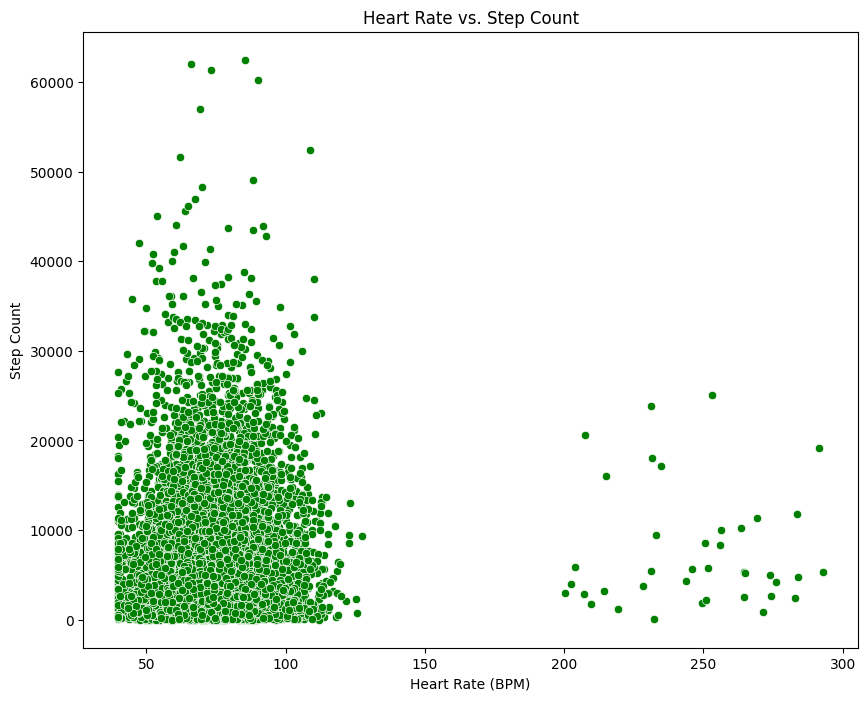

In [16]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x='heart_rate_(bpm)',
    y = 'step_count',
    color = 'g'
)

plt.title('Heart Rate vs. Step Count')
plt.xticks(size = 10)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Step Count')

plt.show()

гистограмма, которая показывает распределение продолжительности сна (sleep_duration_(hours)).

<ipython-input-17-cb58aa605631>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


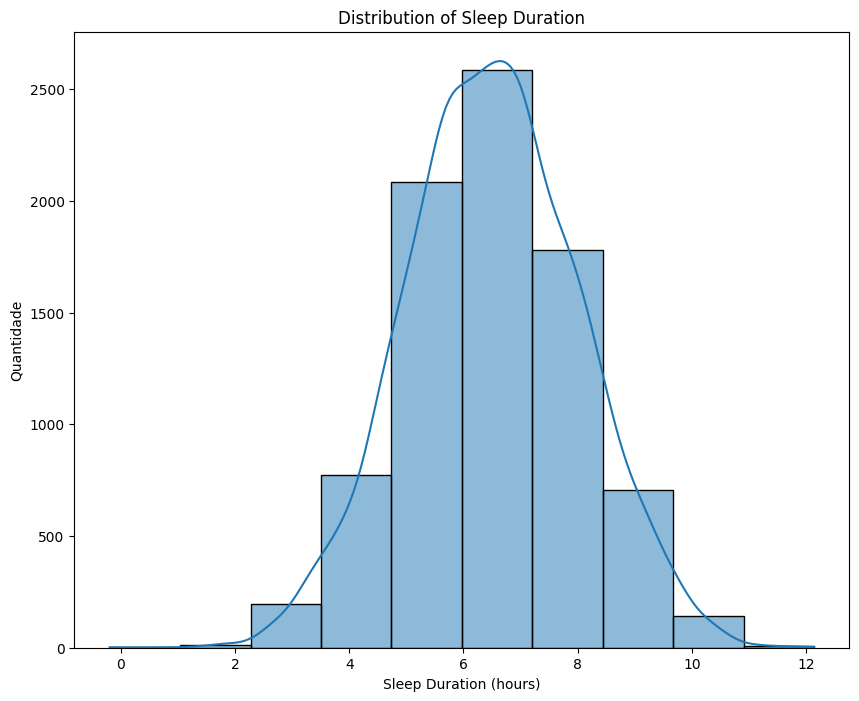

In [17]:
plt.figure(figsize= (10,8))

sns.histplot(
    data = df,
    x = 'sleep_duration_(hours)',
    bins = 10,
    kde = True,
    palette = 'coolwarm'
)

plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quantidade')

plt.show()

In [18]:
df.describe()

,user_id,heart_rate_(bpm),blood_oxygen_level_(%),step_count,sleep_duration_(hours),stress_level
count,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000
mean,3008.310969,76.000396,97.837248,6996.275243,6.504998,5.433691
std,1152.853217,19.030185,1.739699,6904.773042,1.510821,2.869335
min,1001.000000,40.000000,90.791208,0.910138,-0.194453,1.000000
25%,1998.500000,64.921323,96.654310,1994.654512,5.484881,3.000000
50%,3006.000000,75.321211,98.001247,4970.878786,6.497615,5.000000
75%,4005.000000,85.324321,99.377902,9765.357223,7.532584,8.000000
max,4999.000000,292.923300,100.000000,62486.690753,12.140233,10.000000


In [19]:
import pandas as pd
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr(method='spearman')
print(correlation_matrix)


                         user_id  heart_rate_(bpm)  blood_oxygen_level_(%)  \
user_id                 1.000000          0.009751               -0.019736   
heart_rate_(bpm)        0.009751          1.000000               -0.010889   
blood_oxygen_level_(%) -0.019736         -0.010889                1.000000   
step_count              0.018055          0.011941                0.000228   
sleep_duration_(hours) -0.008494         -0.005923                0.003418   
stress_level            0.017497         -0.005051               -0.011857   

                        step_count  sleep_duration_(hours)  stress_level  
user_id                   0.018055               -0.008494      0.017497  
heart_rate_(bpm)          0.011941               -0.005923     -0.005051  
blood_oxygen_level_(%)    0.000228                0.003418     -0.011857  
step_count                1.000000               -0.000546      0.011544  
sleep_duration_(hours)   -0.000546                1.000000     -0.007063  
str

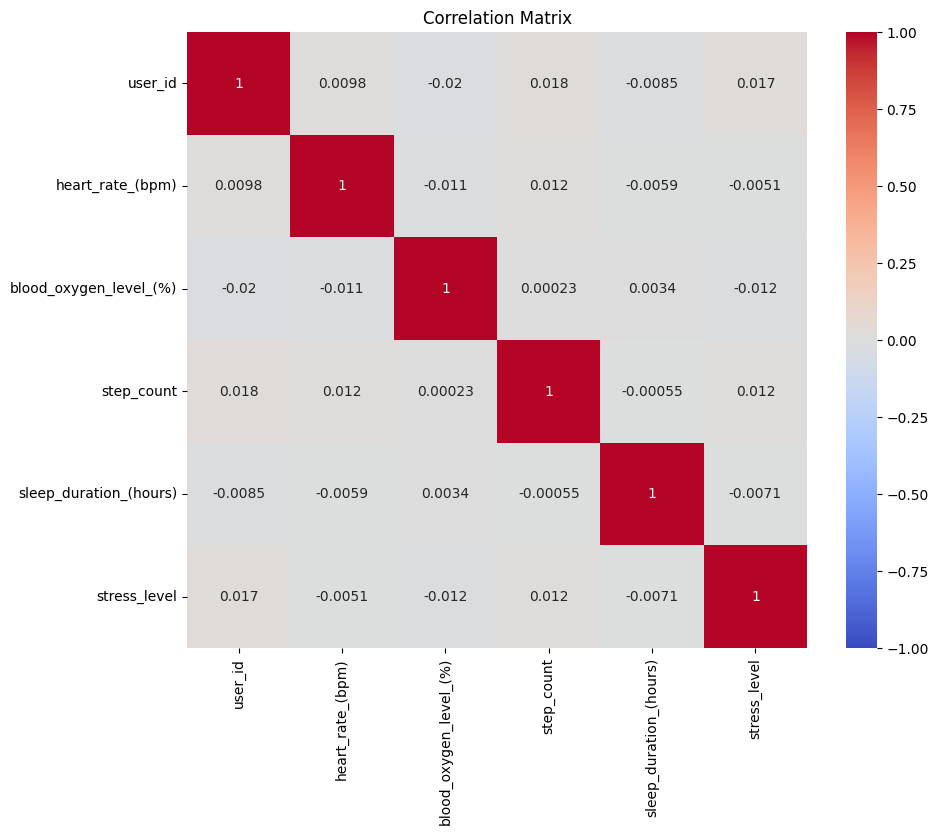

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix')
plt.show()


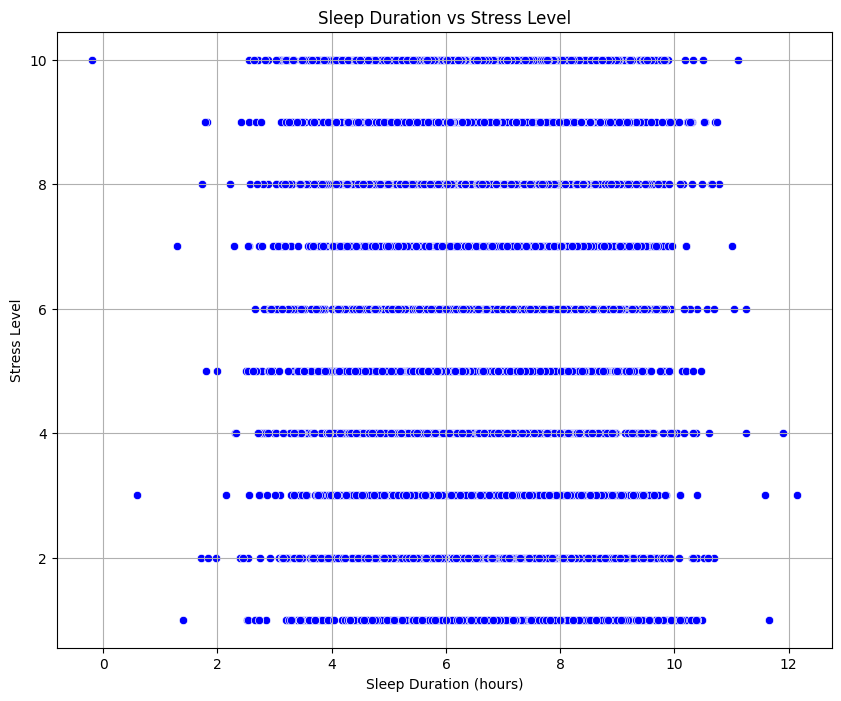

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x='sleep_duration_(hours)',
    y='stress_level',
    color='blue'
)

plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')

plt.grid(True)
plt.show()


In [23]:
df.to_csv('Smartwatchescleaned.csv', index=False)